<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 8.3: Working with Text
- Using [NLTK](http://www.nltk.org) (Natural Language Toolkit)
- Using [spaCy](https://spacy.io)

INSTRUCTIONS:
- Run the cells
- Observe and understand the results
- Answer the questions

## Import libraries

In [1]:
## Import Libraries
%matplotlib inline
import matplotlib.pyplot as plt
from collections import Counter

import regex as re
import spacy
#import nltk

## Load data

In [22]:
## Loading the data

input_file = '../../DATA/ncc-1701-D.txt'

with open(input_file, 'r') as f:
    text = f.read()

## Inspect the data

In [23]:
print(text[:1000])

USS Enterprise (NCC-1701-D)

"For five hundred years, every ship that has borne the name of the Enterprise has become a legend. This one is no different."

The USS Enterprise (NCC-1701-D) was a 24th century United Federation of Planets Galaxy Class starship operated by Starfleet, and the fifth Federation ship to bear the name Enterprise. During her career, the Enterprise served as the Federation flagship. The Enterprise was destroyed during the Battle of Veridian III in 2371.

==History==
===Construction and launch===
The Enterprise was built at Utopia Planitia Fleet Yards orbiting Mars in the Solar system. The construction was a massive undertaking, involving thousands of people across disciplines. Construction was supervised by Commander Orfil Quinteros. Dr. Leah Brahms was responsible for much of the Enterprise's warp propulsion system design. Some of the Enterprise's components were derived from technology originally developed on the USS Pegasus.

One of the ship's nacelle tube was

## Work the data
- if necessary or desired
    - remove text or content, e.g. quotes (") or metadata (===)
    - add content or markers, e.g. (#FLAG, --NAME--)
    - remove or convert special symbols, e.g. "é" to "e"
    - remove or convert emoticons

In [25]:
# load spaCy and the English model
#!python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')

# process the text
doc = nlp(text)

In [26]:
# ANSWER
text = ''.join(token.text_with_ws for token in doc if not token.is_punct)

In [28]:
print(text[:1000])

USS Enterprise NCC-1701D

For five hundred yearsevery ship that has borne the name of the Enterprise has become a legendThis one is no different

The USS Enterprise NCC-1701Dwas a 24th century United Federation of Planets Galaxy Class starship operated by Starfleetand the fifth Federation ship to bear the name EnterpriseDuring her careerthe Enterprise served as the Federation flagshipThe Enterprise was destroyed during the Battle of Veridian III in 2371

==History==
===Construction and launch===
The Enterprise was built at Utopia Planitia Fleet Yards orbiting Mars in the Solar systemThe construction was a massive undertakinginvolving thousands of people across disciplinesConstruction was supervised by Commander Orfil QuinterosDr. Leah Brahms was responsible for much of the Enterprise's warp propulsion system designSome of the Enterprise's components were derived from technology originally developed on the USS Pegasus

One of the ship's nacelle tube was the site of a multiple murdersuic

## Helper method

In [29]:
# create a bar chart of the frequency of the words in the text
def plot_words(tokens, top = 30):
    tokens_counter = Counter(tokens)
    tok = [t for (t, _) in tokens_counter.most_common()]
    val = [v for (_, v) in tokens_counter.most_common()]

    plt.figure(figsize = (16, 6))
    plt.bar(tok[:top], val[:top])
    plt.title('Number of terms: %d' % len(tokens_counter))
    plt.xticks(rotation = 90)

    plt.show()

## spaCy model invocation and text processing
spaCy does the processing of the text as part of the reading of the data.

In [30]:
# load spaCy and the English model
#!python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')

# process the text
doc = nlp(text)

## Tokenise

In [31]:
# only show the results
# spaCy has done it already
for i, t in enumerate(doc):
    print('%2d| %r' % (i+1, t.text))
    if t.text == '.':
        break

 1| 'USS'
 2| 'Enterprise'
 3| 'NCC-1701D'
 4| '\n\n'
 5| 'For'
 6| 'five'
 7| 'hundred'
 8| 'yearsevery'
 9| 'ship'
10| 'that'
11| 'has'
12| 'borne'
13| 'the'
14| 'name'
15| 'of'
16| 'the'
17| 'Enterprise'
18| 'has'
19| 'become'
20| 'a'
21| 'legendThis'
22| 'one'
23| 'is'
24| 'no'
25| 'different'
26| '\n\n'
27| 'The'
28| 'USS'
29| 'Enterprise'
30| 'NCC-1701Dwas'
31| 'a'
32| '24th'
33| 'century'
34| 'United'
35| 'Federation'
36| 'of'
37| 'Planets'
38| 'Galaxy'
39| 'Class'
40| 'starship'
41| 'operated'
42| 'by'
43| 'Starfleetand'
44| 'the'
45| 'fifth'
46| 'Federation'
47| 'ship'
48| 'to'
49| 'bear'
50| 'the'
51| 'name'
52| 'EnterpriseDuring'
53| 'her'
54| 'careerthe'
55| 'Enterprise'
56| 'served'
57| 'as'
58| 'the'
59| 'Federation'
60| 'flagshipThe'
61| 'Enterprise'
62| 'was'
63| 'destroyed'
64| 'during'
65| 'the'
66| 'Battle'
67| 'of'
68| 'Veridian'
69| 'III'
70| 'in'
71| '2371'
72| '\n\n'
73| '='
74| '='
75| 'History=='
76| '\n'
77| '='
78| '='
79| '='
80| 'Construction'
81| 'and'
82|

In [ ]:
# ANSWER

### Stop Words

In [32]:
## spaCy
print('i | with stop words without')
print('--| --------------- ------------')

# for all the tokens
for i, t in enumerate(doc):
    print('%2d| %-15r %r' % (i+1, t.text, ('' if t.is_stop else t.text)))

    # break after the first sentence
    if t.text == '.':
        break

i | with stop words without
--| --------------- ------------
 1| 'USS'           'USS'
 2| 'Enterprise'    'Enterprise'
 3| 'NCC-1701D'     'NCC-1701D'
 4| '\n\n'          '\n\n'
 5| 'For'           ''
 6| 'five'          ''
 7| 'hundred'       ''
 8| 'yearsevery'    'yearsevery'
 9| 'ship'          'ship'
10| 'that'          ''
11| 'has'           ''
12| 'borne'         'borne'
13| 'the'           ''
14| 'name'          ''
15| 'of'            ''
16| 'the'           ''
17| 'Enterprise'    'Enterprise'
18| 'has'           ''
19| 'become'        ''
20| 'a'             ''
21| 'legendThis'    'legendThis'
22| 'one'           ''
23| 'is'            ''
24| 'no'            ''
25| 'different'     'different'
26| '\n\n'          '\n\n'
27| 'The'           ''
28| 'USS'           'USS'
29| 'Enterprise'    'Enterprise'
30| 'NCC-1701Dwas'  'NCC-1701Dwas'
31| 'a'             ''
32| '24th'          '24th'
33| 'century'       'century'
34| 'United'        'United'
35| 'Federation'    'Federation'
36| 

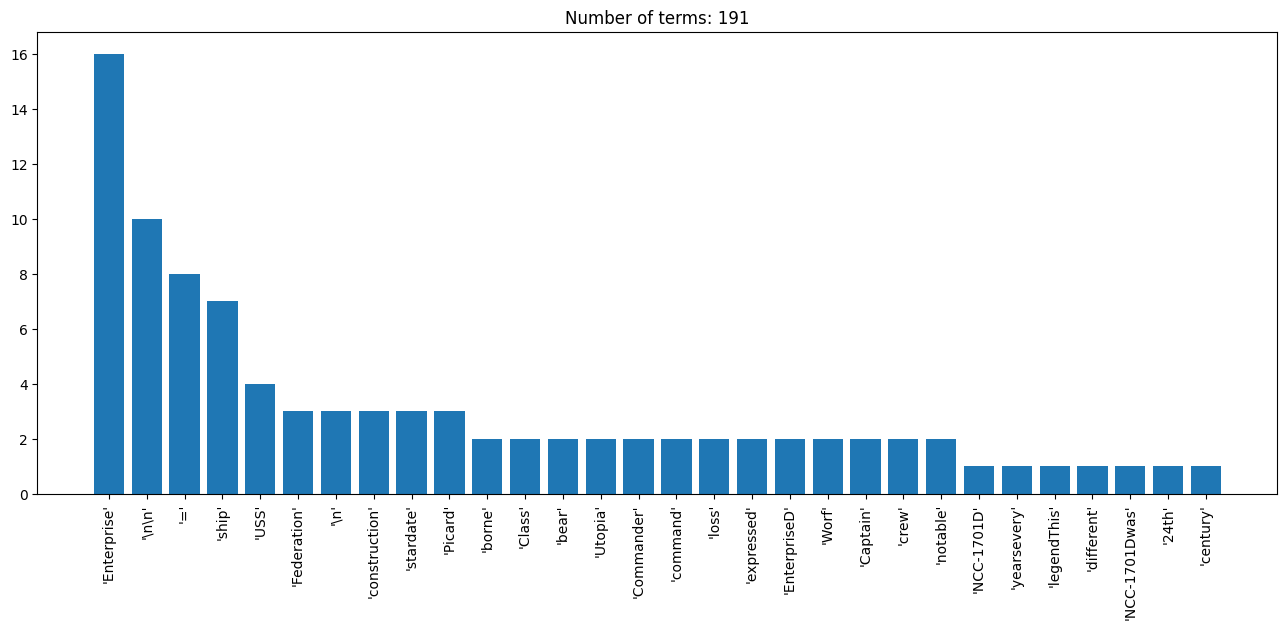

In [33]:
plot_words(['%r' % t.text for t in doc if not (t.is_stop | t.is_punct)])

### Check Part of Speech

In [34]:
## spaCy
for i, t in enumerate(doc):
    print('%2d|%-12r : %-5s %s' % (i+1, t.text, t.pos_, t.tag_))
    if t.text == '.':
        break

 1|'USS'        : PROPN NNP
 2|'Enterprise' : PROPN NNP
 3|'NCC-1701D'  : PROPN NNP
 4|'\n\n'       : SPACE _SP
 5|'For'        : ADP   IN
 6|'five'       : NUM   CD
 7|'hundred'    : NUM   CD
 8|'yearsevery' : NOUN  NN
 9|'ship'       : NOUN  NN
10|'that'       : PRON  WDT
11|'has'        : AUX   VBZ
12|'borne'      : VERB  VBN
13|'the'        : DET   DT
14|'name'       : NOUN  NN
15|'of'         : ADP   IN
16|'the'        : DET   DT
17|'Enterprise' : PROPN NNP
18|'has'        : AUX   VBZ
19|'become'     : VERB  VBN
20|'a'          : DET   DT
21|'legendThis' : ADJ   JJ
22|'one'        : NOUN  NN
23|'is'         : AUX   VBZ
24|'no'         : ADV   RB
25|'different'  : ADJ   JJ
26|'\n\n'       : SPACE _SP
27|'The'        : DET   DT
28|'USS'        : PROPN NNP
29|'Enterprise' : PROPN NNP
30|'NCC-1701Dwas' : VERB  VBD
31|'a'          : DET   DT
32|'24th'       : ADJ   JJ
33|'century'    : NOUN  NN
34|'United'     : PROPN NNP
35|'Federation' : PROPN NNP
36|'of'         : ADP   IN
37|'Plane

### Lemmatisation

In [35]:
## spaCy
print('i | Token        Lemma')
print('--| ------------ ------------')
for i, t in enumerate(doc):
    print('%2d| %-12r %r' % (i+1, t.text, t.lemma_))
    if t.text == '.':
        break

i | Token        Lemma
--| ------------ ------------
 1| 'USS'        'USS'
 2| 'Enterprise' 'Enterprise'
 3| 'NCC-1701D'  'NCC-1701D'
 4| '\n\n'       '\n\n'
 5| 'For'        'for'
 6| 'five'       'five'
 7| 'hundred'    'hundred'
 8| 'yearsevery' 'yearsevery'
 9| 'ship'       'ship'
10| 'that'       'that'
11| 'has'        'have'
12| 'borne'      'bear'
13| 'the'        'the'
14| 'name'       'name'
15| 'of'         'of'
16| 'the'        'the'
17| 'Enterprise' 'Enterprise'
18| 'has'        'have'
19| 'become'     'become'
20| 'a'          'a'
21| 'legendThis' 'legendthis'
22| 'one'        'one'
23| 'is'         'be'
24| 'no'         'no'
25| 'different'  'different'
26| '\n\n'       '\n\n'
27| 'The'        'the'
28| 'USS'        'USS'
29| 'Enterprise' 'Enterprise'
30| 'NCC-1701Dwas' 'ncc-1701dwa'
31| 'a'          'a'
32| '24th'       '24th'
33| 'century'    'century'
34| 'United'     'United'
35| 'Federation' 'Federation'
36| 'of'         'of'
37| 'Planets'    'Planets'
38| 'Galaxy'

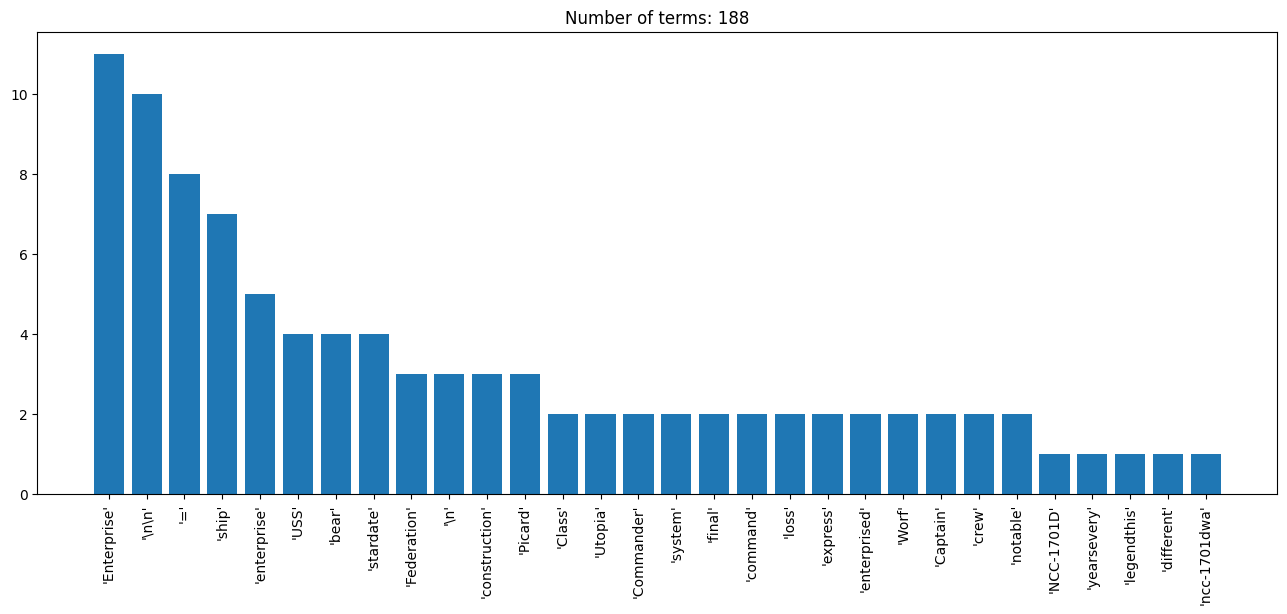

In [36]:
plot_words(['%r' % t.lemma_ for t in doc if not (t.is_stop | t.is_punct)])

### Entity Recognition

In [37]:
## spaCy
for i, s in enumerate(doc.sents):
    print('%2d: %s' % (i, re.sub(r'\n+', '', s.text)))
    if s.as_doc().ents:
        print('-'*80)
        for e in s.as_doc().ents:
            print('%-11s: %s' % (e.label_, re.sub(r'\n+', '', e.text)))
    print('='*80)

 0: USS Enterprise NCC-1701DFor five hundred yearsevery ship that has borne the name of the Enterprise has become a legendThis one is no differentThe USS Enterprise NCC-1701Dwas a 24th century United Federation of Planets Galaxy Class starship operated by Starfleetand the fifth Federation ship to bear the name
--------------------------------------------------------------------------------
ORG        : USS Enterprise NCC-1701D
CARDINAL   : five hundred
ORG        : Enterprise
PRODUCT    : The USS Enterprise
DATE       : a 24th century
ORG        : United Federation of Planets Galaxy
GPE        : Starfleetand
ORDINAL    : fifth
 1: EnterpriseDuring her careerthe Enterprise served as the Federation flagshipThe Enterprise was destroyed during the Battle of Veridian III in 2371==History=====Construction and launch===The Enterprise was built at Utopia Planitia Fleet Yards orbiting Mars in the Solar systemThe construction was a massive undertakinginvolving thousands of people across discipli

## Extra: Using NLTK for NLP

### Tokenise

In [38]:
import nltk
# use nltk to find tokens
tokens = nltk.word_tokenize(text)

for i, t in enumerate(tokens[:25]):
    print('%2d| %r' % (i+1, t))

 1| 'USS'
 2| 'Enterprise'
 3| 'NCC-1701D'
 4| 'For'
 5| 'five'
 6| 'hundred'
 7| 'yearsevery'
 8| 'ship'
 9| 'that'
10| 'has'
11| 'borne'
12| 'the'
13| 'name'
14| 'of'
15| 'the'
16| 'Enterprise'
17| 'has'
18| 'become'
19| 'a'
20| 'legendThis'
21| 'one'
22| 'is'
23| 'no'
24| 'different'
25| 'The'


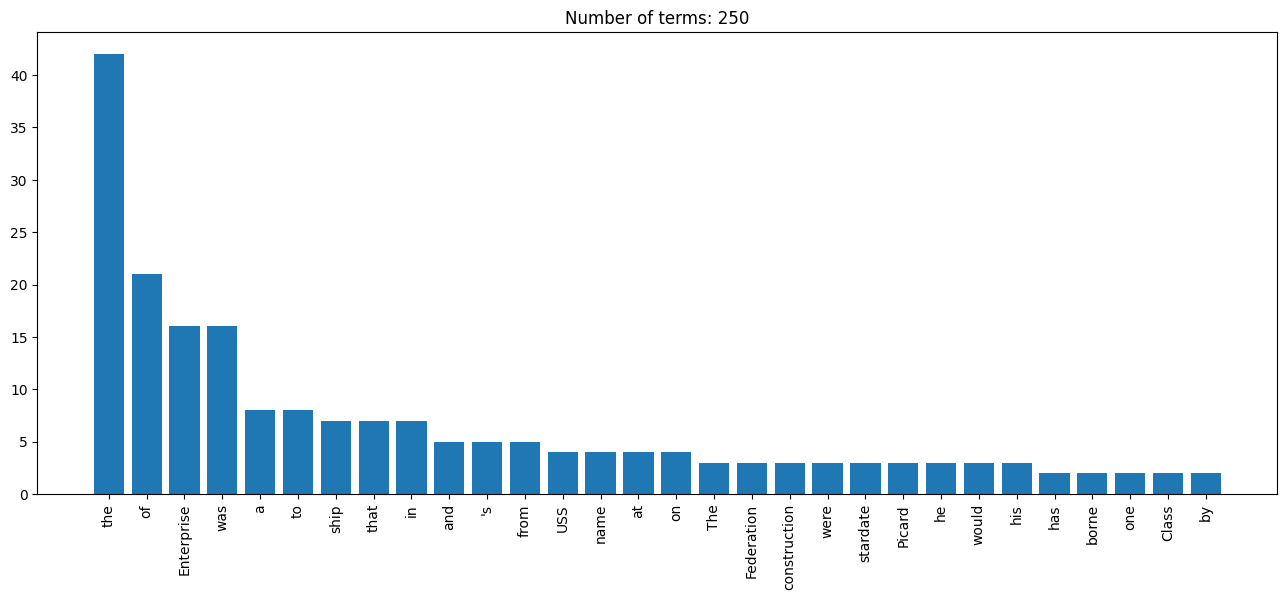

In [39]:
plot_words(tokens)

### Stop words

In [40]:
stopWords = nltk.corpus.stopwords.words('english')

stopWords.sort()
print(', '.join(stopWords))

a, about, above, after, again, against, ain, all, am, an, and, any, are, aren, aren't, as, at, be, because, been, before, being, below, between, both, but, by, can, couldn, couldn't, d, did, didn, didn't, do, does, doesn, doesn't, doing, don, don't, down, during, each, few, for, from, further, had, hadn, hadn't, has, hasn, hasn't, have, haven, haven't, having, he, her, here, hers, herself, him, himself, his, how, i, if, in, into, is, isn, isn't, it, it's, its, itself, just, ll, m, ma, me, mightn, mightn't, more, most, mustn, mustn't, my, myself, needn, needn't, no, nor, not, now, o, of, off, on, once, only, or, other, our, ours, ourselves, out, over, own, re, s, same, shan, shan't, she, she's, should, should've, shouldn, shouldn't, so, some, such, t, than, that, that'll, the, their, theirs, them, themselves, then, there, these, they, this, those, through, to, too, under, until, up, ve, very, was, wasn, wasn't, we, were, weren, weren't, what, when, where, which, while, who, whom, why, w

In [41]:
# ANSWER
# NOTE: see the `.lower()` method applied to token
tokens_no_stop = [w for w in tokens if not w.lower() in stopWords] # create a list of tokens withOUT the stop words

In [42]:
## NLTK
i = 0
j = 0

print('i | with stop words without')
print('--| --------------- ------------')

# for all the tokens
while i < len(tokens):
    # same word
    if tokens[i] == tokens_no_stop[j]:
        print('%2d| %-15r %r' % (i+1, tokens[i], tokens_no_stop[j]))
        j += 1
    # not the same word
    else:
        print('%2d| %-15r' % (i+1, tokens[i]))

    # next word
    i += 1
    # break after the first sentence
    if tokens[i-1] == '.':
        break

i | with stop words without
--| --------------- ------------
 1| 'USS'           'USS'
 2| 'Enterprise'    'Enterprise'
 3| 'NCC-1701D'     'NCC-1701D'
 4| 'For'          
 5| 'five'          'five'
 6| 'hundred'       'hundred'
 7| 'yearsevery'    'yearsevery'
 8| 'ship'          'ship'
 9| 'that'         
10| 'has'          
11| 'borne'         'borne'
12| 'the'          
13| 'name'          'name'
14| 'of'           
15| 'the'          
16| 'Enterprise'    'Enterprise'
17| 'has'          
18| 'become'        'become'
19| 'a'            
20| 'legendThis'    'legendThis'
21| 'one'           'one'
22| 'is'           
23| 'no'           
24| 'different'     'different'
25| 'The'          
26| 'USS'           'USS'
27| 'Enterprise'    'Enterprise'
28| 'NCC-1701Dwas'  'NCC-1701Dwas'
29| 'a'            
30| '24th'          '24th'
31| 'century'       'century'
32| 'United'        'United'
33| 'Federation'    'Federation'
34| 'of'           
35| 'Planets'       'Planets'
36| 'Galaxy'        

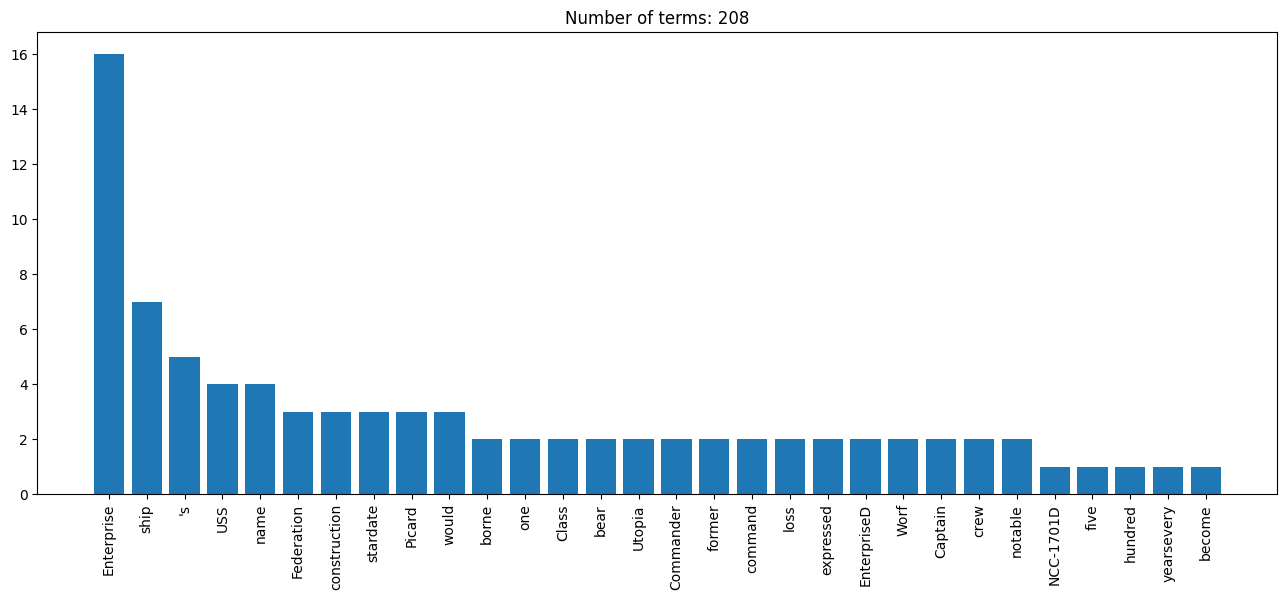

In [43]:
# Create plot of words without stopword
# ANSWER
plot_words(tokens_no_stop)


### Check Part of Speech

In [44]:
# define PoS
pos_list = {
    'CC':   'coordinating conjunction',
    'CD':   'cardinal digit',
    'DT':   'determiner',
    'EX':   'existential there (like: "there is" ... think of it like "there exists")',
    'FW':   'foreign word',
    'IN':   'preposition/subordinating conjunction',
    'JJ':   'adjective "big"',
    'JJR':  'adjective, comparative "bigger"',
    'JJS':  'adjective, superlative "biggest"',
    'LS':   'list marker 1)',
    'MD':   'modal could, will',
    'NN':   'noun, singular "desk"',
    'NNS':  'noun plural "desks"',
    'NNP':  'proper noun, singular "Harrison"',
    'NNPS': 'proper noun, plural "Americans"',
    'PDT':  'predeterminer "all the kids"',
    'POS':  'possessive ending parent"s',
    'PRP':  'personal pronoun I, he, she',
    'PRP$': 'possessive pronoun my, his, hers',
    'RB':   'adverb very, silently,',
    'RBR':  'adverb, comparative better',
    'RBS':  'adverb, superlative best',
    'RP':   'particle give up',
    'TO':   'to go "to" the store.',
    'UH':   'interjection errrrrrrrm',
    'VB':   'verb, base form take',
    'VBD':  'verb, past tense took',
    'VBG':  'verb, gerund/present participle taking',
    'VBN':  'verb, past participle taken',
    'VBP':  'verb, sing. present, non-3d take',
    'VBZ':  'verb, 3rd person sing. present takes',
    'WDT':  'wh-determiner which',
    'WP':   'wh-pronoun who, what',
    'WP$':  'possessive wh-pronoun whose',
    'WRB':  'wh-abverb where, when',
}

In [46]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Louis\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [47]:
## nltk
tagged = nltk.pos_tag(tokens)

for i, t in enumerate(tagged[:25]):
    print('%2d|%-12r : %-4s %s' % (i+1, t[0], t[1], (pos_list[t[1]] if t[1] in pos_list else '-')))

 1|'USS'        : NNP  proper noun, singular "Harrison"
 2|'Enterprise' : NNP  proper noun, singular "Harrison"
 3|'NCC-1701D'  : NNP  proper noun, singular "Harrison"
 4|'For'        : IN   preposition/subordinating conjunction
 5|'five'       : CD   cardinal digit
 6|'hundred'    : JJ   adjective "big"
 7|'yearsevery' : NN   noun, singular "desk"
 8|'ship'       : NN   noun, singular "desk"
 9|'that'       : WDT  wh-determiner which
10|'has'        : VBZ  verb, 3rd person sing. present takes
11|'borne'      : VBN  verb, past participle taken
12|'the'        : DT   determiner
13|'name'       : NN   noun, singular "desk"
14|'of'         : IN   preposition/subordinating conjunction
15|'the'        : DT   determiner
16|'Enterprise' : NNP  proper noun, singular "Harrison"
17|'has'        : VBZ  verb, 3rd person sing. present takes
18|'become'     : VBN  verb, past participle taken
19|'a'          : DT   determiner
20|'legendThis' : JJ   adjective "big"
21|'one'        : CD   cardinal digi

### Stemming

In [48]:
## nltk
ps = nltk.porter.PorterStemmer()
stemmed = ' '.join([ps.stem(word) for word in text.split()])

### Lemmatisation

In [49]:
## nltk
wl = nltk.stem.WordNetLemmatizer()
lemma = ' '.join([wl.lemmatize(word) for word in text.split()])

In [50]:
## nltk
dot = stemmed.find('.') + 1
sl = stemmed[:dot].split()
dot = lemma.find('.') + 1
ll = lemma[:dot].split()

print('i | Stem           Lemma')
print('--| -------------- ------------')
for i, p in enumerate(zip(sl, ll)):
    print('%2d| %-12r   %-12r' % (i+1, p[0], p[1]))

i | Stem           Lemma
--| -------------- ------------
 1| 'uss'          'USS'       
 2| 'enterpris'    'Enterprise'
 3| 'ncc-1701d'    'NCC-1701D' 
 4| 'for'          'For'       
 5| 'five'         'five'      
 6| 'hundr'        'hundred'   
 7| 'yearseveri'   'yearsevery'
 8| 'ship'         'ship'      
 9| 'that'         'that'      
10| 'ha'           'ha'        
11| 'born'         'borne'     
12| 'the'          'the'       
13| 'name'         'name'      
14| 'of'           'of'        
15| 'the'          'the'       
16| 'enterpris'    'Enterprise'
17| 'ha'           'ha'        
18| 'becom'        'become'    
19| 'a'            'a'         
20| 'legendthi'    'legendThis'
21| 'one'          'one'       
22| 'is'           'is'        
23| 'no'           'no'        
24| 'differ'       'different' 
25| 'the'          'The'       
26| 'uss'          'USS'       
27| 'enterpris'    'Enterprise'
28| 'ncc-1701dwa'   'NCC-1701Dwas'
29| 'a'            'a'         
30| '24th'  

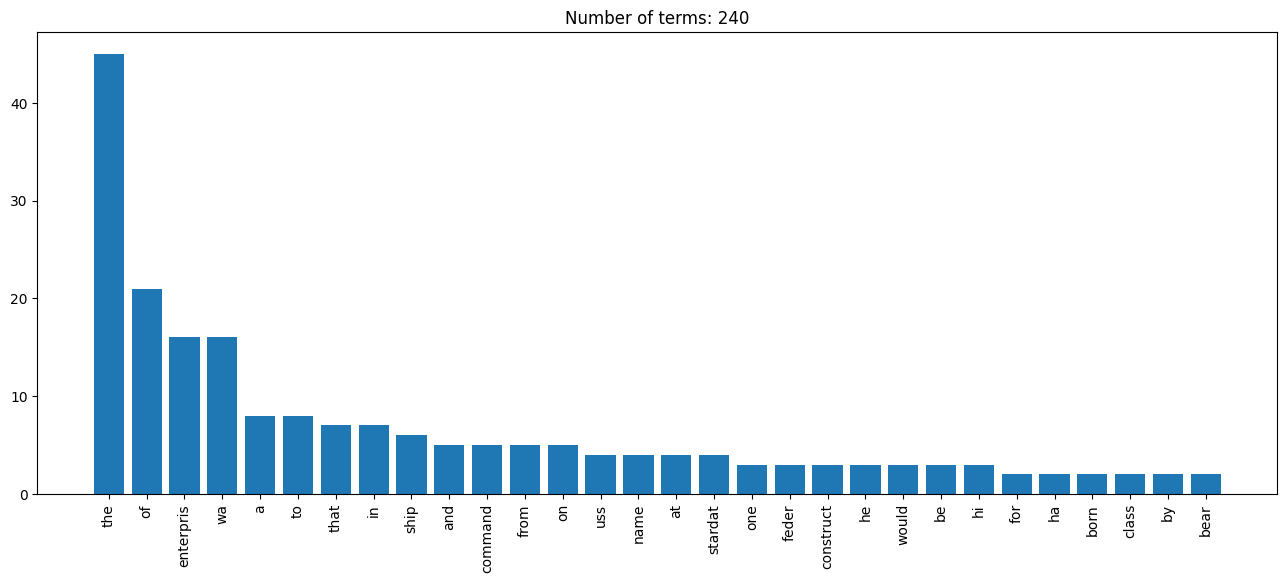

In [51]:
plot_words(stemmed.split())

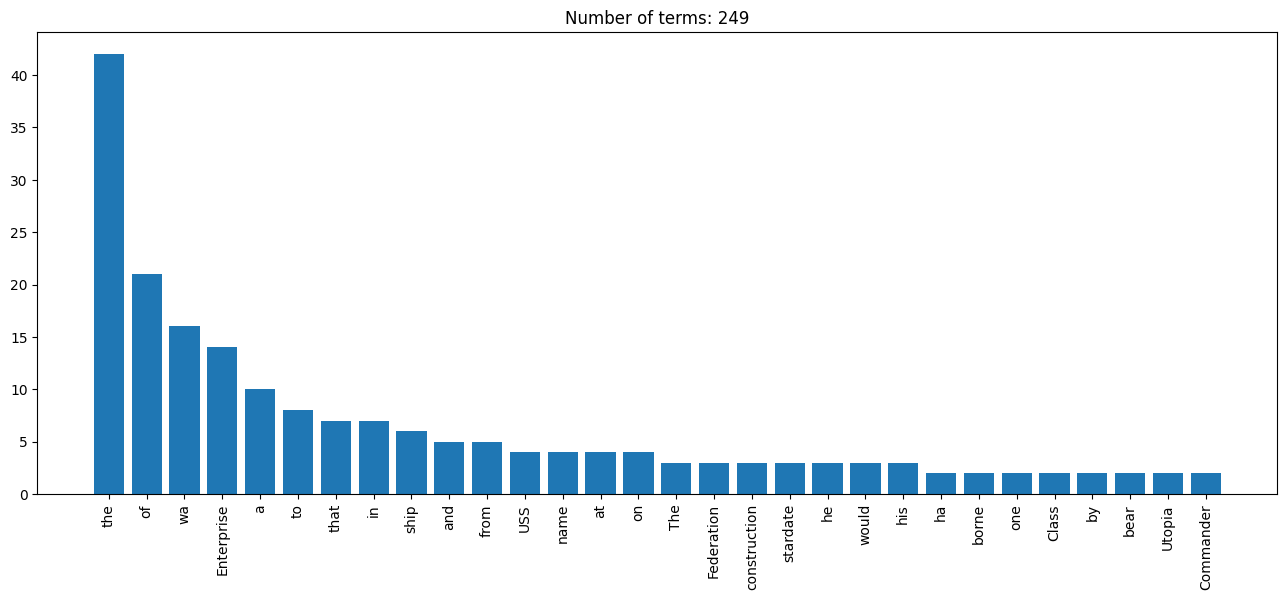

In [52]:
plot_words(lemma.split())

### Entity recognition

In [54]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Louis\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.


True

In [56]:
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Louis\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

In [57]:
## nltk
entities = nltk.chunk.ne_chunk(tagged)

for e in entities:
    s = re.sub(r'[\(\)]', '', str(e))
    if s.find('/NNP') > 0:
        t = s.split()[0]
        n = ' '.join([re.sub(r'/NNP', '', x) for x in s.split()[1:]])
        print('%-12s: %s' % (t, n))

ORGANIZATION: USS Enterprise
ORGANIZATION: Enterprise
ORGANIZATION: USS Enterprise
PERSON      : United Federation
ORGANIZATION: Planets Galaxy
PERSON      : Enterprise
ORGANIZATION: Federation
ORGANIZATION: flagshipThe/NN Enterprise
ORGANIZATION: Battle
GPE         : Veridian
ORGANIZATION: Utopia Planitia Fleet
PERSON      : Mars
ORGANIZATION: Solar
ORGANIZATION: Commander Orfil
PERSON      : Leah Brahms
ORGANIZATION: Enterprise
ORGANIZATION: Enterprise
ORGANIZATION: USS
ORGANIZATION: Utopia
ORGANIZATION: teamWalter/NN Piercebecame
PERSON      : Finn
PERSON      : William Hodgesthen
ORGANIZATION: MarsOn
ORGANIZATION: Enterprise
FACILITY    : Earth Station McKinleyCaptain
ORGANIZATION: JeanLuc Picard
ORGANIZATION: Rear Admiral Norah Satie
PERSON      : Riker
ORGANIZATION: EnterpriseHaving
ORGANIZATION: EnterpriseD
ORGANIZATION: Enterprise
PERSON      : Worf
PERSON      : Deep Space
ORGANIZATION: StarfleetStation
PERSON      : Captain Benjamin Sisko
ORGANIZATION: Enterprise
ORGANIZATION



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



